# Import Libraries

In [194]:
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [195]:
df=pd.read_csv("Admission.csv")
print(df.head())

    GPA  GMAT Decision
0  2.96   596    admit
1  3.14   473    admit
2  3.22   482    admit
3  3.29   527    admit
4  3.69   505    admit


AxesSubplot(0.125,0.125;0.775x0.755)


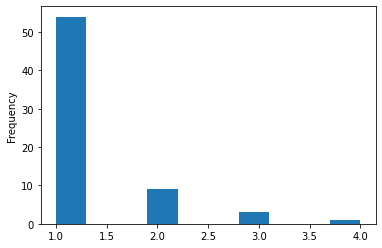

In [196]:
print(df[['GPA']].value_counts().plot(kind='hist'))

In [197]:
print(df[(df["GPA"]>3)& (df["Decision"]=="admit")&(df["GMAT"]>600)])


     GPA  GMAT Decision
5   3.46   693    admit
6   3.03   626    admit
7   3.19   663    admit
14  3.44   692    admit
24  3.38   605    admit
25  3.26   664    admit
26  3.60   609    admit
29  3.76   646    admit


## Find how many students have a gpa higher than 3 and were not accepted

In [198]:
print(len(df[(df.GPA>3)&(df.Decision=="notadmit")]))

0


In [199]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [200]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# OneHot encode the training and val dataset categorical columns
m=df.Decision.unique()
O = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
O.index=df.index
df.drop(object_cols,axis=1,inplace=True)
remain=np.array(df.columns)
df=df.join(O)
final=np.concatenate([remain,m])
df.columns = final

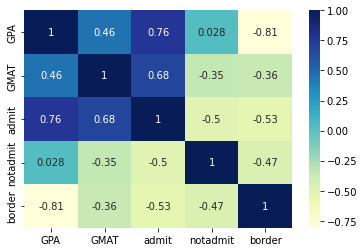

In [201]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)